# Quality Wine Analysis (Major Project)


In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import IsolationForest
from sklearn.feature_selection import SelectKBest, f_regression
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

### importing csv file

In [2]:
data = pd.read_csv(r'C:\Users\deepe\OneDrive\Desktop\corizo project major and minor\major project\wine_data.csv')


### Top 5 rows of Dataset

In [3]:
data.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5.0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5.0
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5.0
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6.0
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5.0


### Last 5 Rows

In [4]:
data.tail()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.52,0.58,10.5,5.0
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6.0
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.52,0.75,11.0,6.0
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.52,0.71,10.2,5.0
1598,6.0,0.310,0.47,3.6,0.067,18.0,42.0,0.99549,3.52,0.66,11.0,6.0


### finding no of rows and columns

In [5]:
data.shape

(1599, 12)

### printing number of rows and columns

In [6]:
print("Number of rows",data.shape[0])
print("Number of column",data.shape[1])

Number of rows 1599
Number of column 12


### Getting information of our dataset(like datatype,column,memory usage etc)

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1598 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1598 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1598 non-null   float64
dtypes: float64(12)
memory usage: 150.0 KB


### checking null values in the dataset

In [8]:
data.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    1
density                 0
pH                      1
sulphates               0
alcohol                 0
quality                 1
dtype: int64

In [9]:
data=data.dropna()

### Get overall statistics about the dataset

In [10]:
data.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1596.000000,1596.000000,1596.000000,1596.000000,1596.000000,1596.000000,1596.000000,1596.000000,1596.000000,1596.000000,1596.000000,1596.000000
mean,8.321366,0.527666,0.271128,2.536936,0.087487,15.882206,46.431078,0.996745,3.498716,0.658189,10.424217,5.636591
std,1.742121,0.179154,0.194847,1.408341,0.047107,10.467380,32.893072,0.001889,0.080297,0.169587,1.066046,0.807963
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.520000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996745,3.520000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997842,3.520000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,3.900000,2.000000,14.900000,8.000000


### Total columns

In [11]:
data.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')

In [12]:
import matplotlib.pyplot as plt

### Quality vs Fixed Acidity

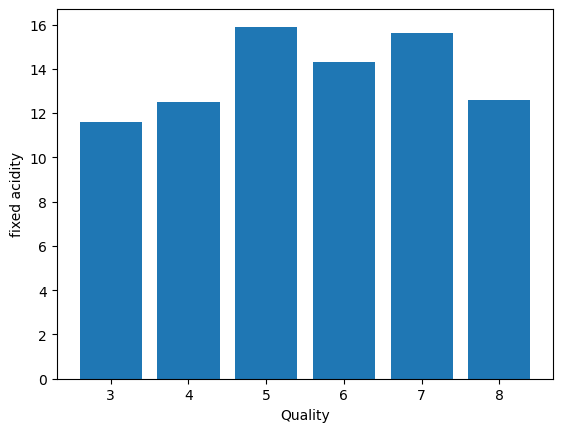

In [13]:
plt.bar(data['quality'],data['fixed acidity'])
plt.xlabel('Quality')
plt.ylabel('fixed acidity')
plt.show()

### quality vs volatile acidity

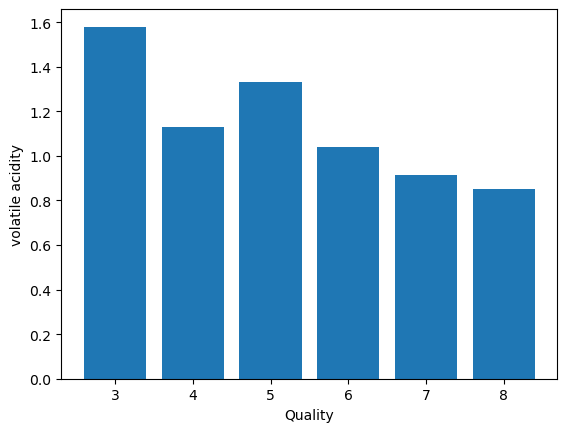

In [14]:
plt.bar(data['quality'],data['volatile acidity'])
plt.xlabel('Quality')
plt.ylabel('volatile acidity')
plt.show()

### Quality vs citric acid

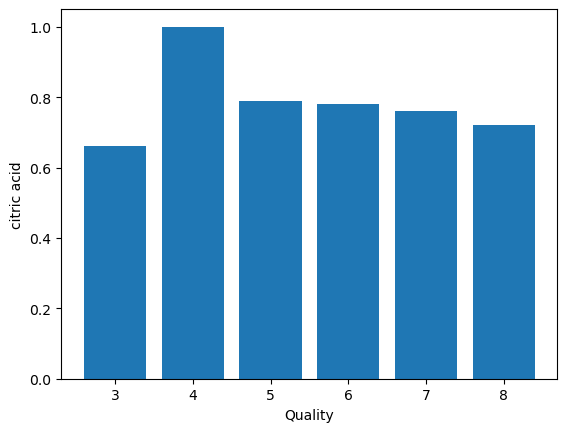

In [15]:
plt.bar(data['quality'],data['citric acid'])
plt.xlabel('Quality')
plt.ylabel('citric acid')
plt.show()

### Quality vs residual sugar

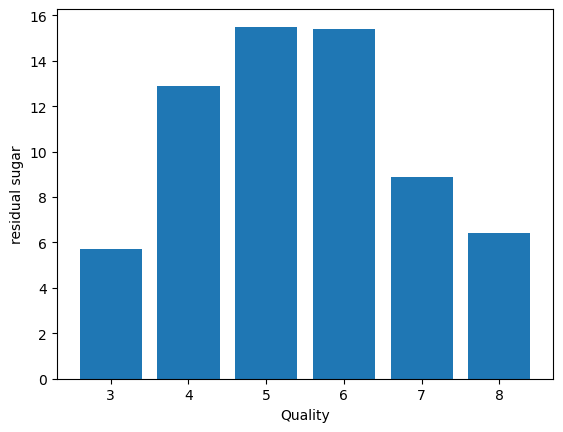

In [16]:
plt.bar(data['quality'],data['residual sugar'])
plt.xlabel('Quality')
plt.ylabel('residual sugar')
plt.show()

### Quality vs chlorides

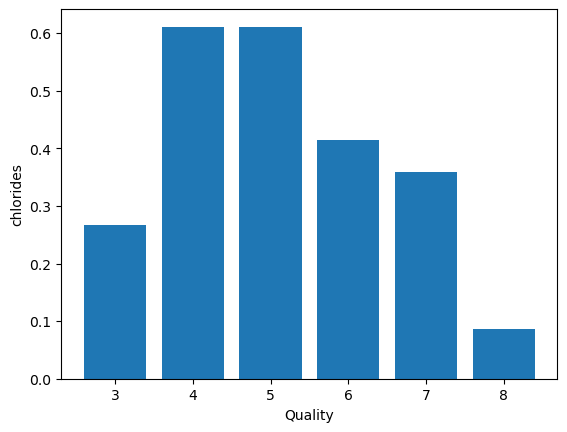

In [17]:
plt.bar(data['quality'],data['chlorides'])
plt.xlabel('Quality')
plt.ylabel('chlorides')
plt.show()

### Quality vs free sulfur dioxide

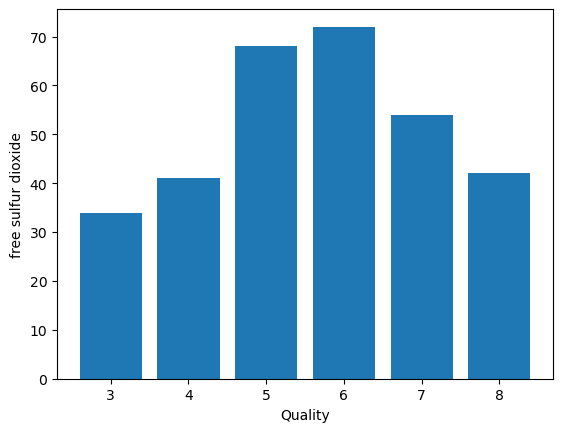

In [18]:
plt.bar(data['quality'],data['free sulfur dioxide'])
plt.xlabel('Quality')
plt.ylabel('free sulfur dioxide')
plt.show()

### Quality vs total sulfur dioxide

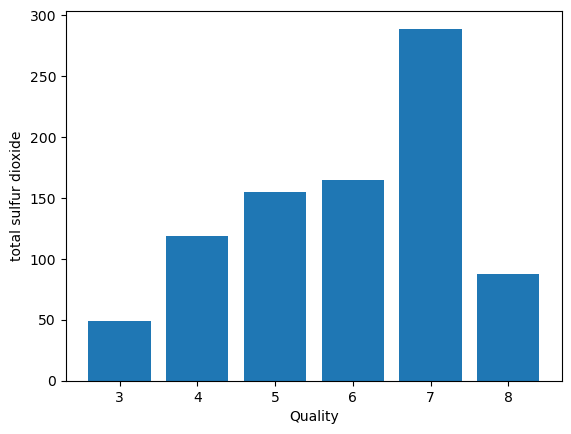

In [19]:
plt.bar(data['quality'],data['total sulfur dioxide'])
plt.xlabel('Quality')
plt.ylabel('total sulfur dioxide')
plt.show()

### Quality vs density

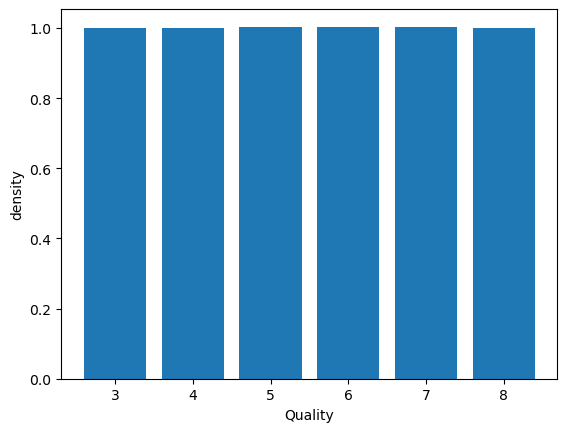

In [20]:
plt.bar(data['quality'],data['density'])
plt.xlabel('Quality')
plt.ylabel('density')
plt.show()

### Quality vs pH

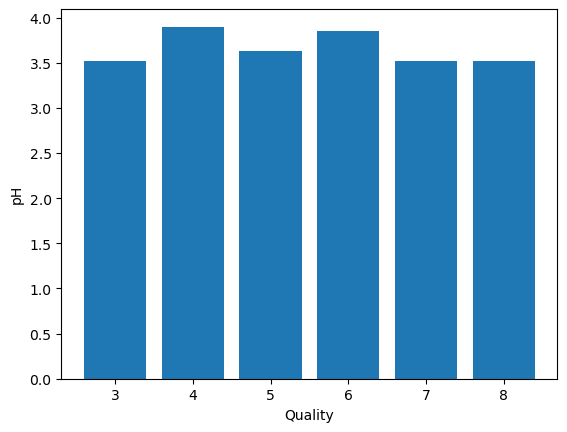

In [21]:
plt.bar(data['quality'],data['pH'])
plt.xlabel('Quality')
plt.ylabel('pH')
plt.show()

### Quality vs sulphates

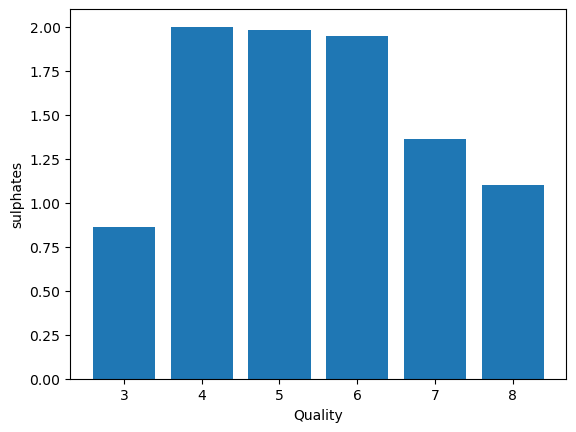

In [22]:
plt.bar(data['quality'],data['sulphates'])
plt.xlabel('Quality')
plt.ylabel('sulphates')
plt.show()

### Quality vs alcohol

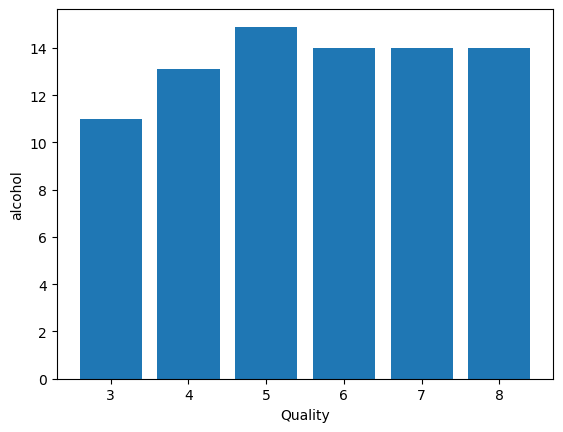

In [23]:
plt.bar(data['quality'],data['alcohol'])
plt.xlabel('Quality')
plt.ylabel('alcohol')
plt.show()

### correlation Matrix

In [24]:
import seaborn as sns

<AxesSubplot:>

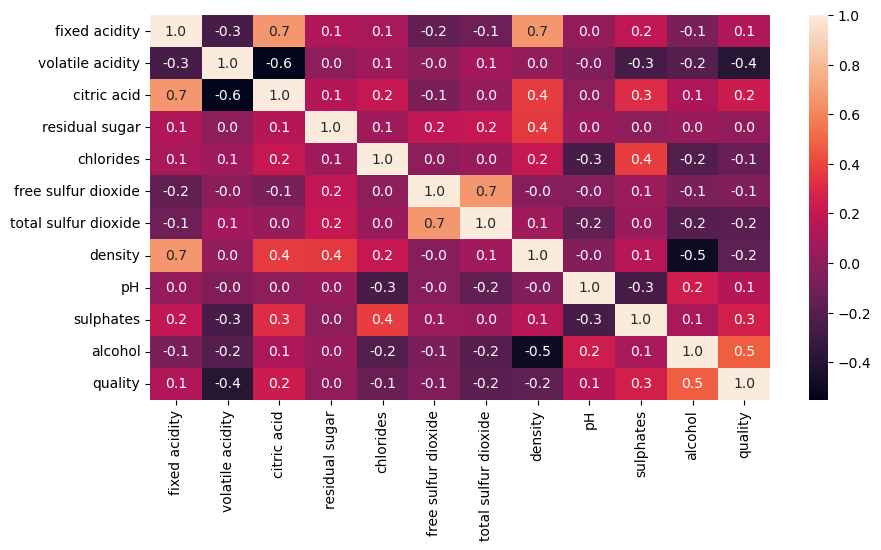

In [25]:
plt.figure(figsize=(10,5))
sns.heatmap(data.corr(),annot=True,fmt='0.1f')

### Binarization of target variable

In [26]:
data['quality'].unique()

array([5., 6., 7., 4., 8., 3.])

In [27]:
data['quality']=[1 if x>=7 else 0 for x in data['quality']]

In [28]:
data['quality'].unique()

array([0, 1], dtype=int64)

### Not Handling Imbalanced

In [29]:
data['quality'].value_counts()

0    1379
1     217
Name: quality, dtype: int64

In [30]:
import seaborn as sns

C:\Users\deepe\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='quality', ylabel='count'>

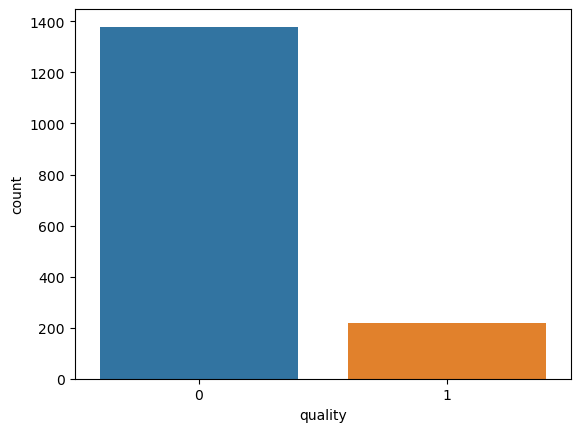

In [31]:
sns.countplot(data['quality'])

### Store feature matrix in X and Response (Target) in vector Y

In [32]:
X=data.drop('quality',axis=1)
y=data['quality']

In [33]:
X

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4
...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.52,0.58,10.5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.52,0.75,11.0
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.52,0.71,10.2


In [34]:
y

0       0
1       0
2       0
3       0
4       0
       ..
1594    0
1595    0
1596    0
1597    0
1598    0
Name: quality, Length: 1596, dtype: int64

### Splitting the Dataset into the Training set and Testing set

In [35]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.20,random_state=42)

### feature Scaling

In [36]:
from sklearn.preprocessing import StandardScaler

In [37]:
st=StandardScaler()

In [38]:
X_train=st.fit_transform(X_train)

In [39]:
X_test=st.fit_transform(X_test)

In [40]:
X_train

array([[-1.27525952, -1.17673516, -0.10937401, ...,  0.26790084,
         1.78453028,  0.16600727],
       [ 0.18116246, -1.11993923,  0.66111495, ...,  0.26790084,
        -1.03418363, -0.95377392],
       [ 0.99675877, -1.34712296,  0.66111495, ...,  0.26790084,
         1.43938164, -0.67382862],
       ...,
       [-0.63443385,  0.52714281, -1.08532668, ...,  0.26790084,
        -0.74655976, -0.67382862],
       [-0.86746137,  0.64073468, -1.23942447, ...,  0.26790084,
        -0.45893589, -0.02062293],
       [ 1.28804316, -0.5519799 ,  0.4042853 , ...,  0.26790084,
         0.17383662,  0.07269217]])

### Applying PCA

In [41]:
from sklearn.decomposition import PCA

In [42]:
pca=PCA(n_components=0.90)

X_train=pca.fit_transform(X_train)
X_test=pca.transform(X_test)

In [43]:
sum(pca.explained_variance_ratio_)

0.9418986637634519

### Handling Imbalanced Dataset

In [44]:
from imblearn.over_sampling import SMOTE
X_res,y_res=SMOTE().fit_resample(X,y)
y_res.value_counts()

0    1379
1    1379
Name: quality, dtype: int64

### Logestic Regression

In [45]:
from sklearn.linear_model import LogisticRegression

In [46]:
log=LogisticRegression()
log.fit(X_train,y_train)

LogisticRegression()

In [47]:
y_pred1=log.predict(X_test)

In [48]:
from sklearn.metrics import accuracy_score

In [49]:
print(len(y_test))
print(len(y_pred1))
print(len(X_test))
print(len(y_test))

320
320
320
320


In [50]:
accuracy_score(y_test,y_pred1)

0.878125

In [51]:
from sklearn.metrics import precision_score,recall_score,f1_score

In [52]:
precision_score(y_test,y_pred1)

0.65

In [53]:
recall_score(y_test,y_pred1)

0.28888888888888886

In [54]:
f1_score(y_test,y_pred1)

0.39999999999999997

In [55]:
from sklearn.linear_model import LogisticRegression

In [56]:
log=LogisticRegression()
log.fit(X_train,y_train)

LogisticRegression()

In [57]:
y_pred1=log.predict(X_test)

In [58]:
from sklearn.metrics import accuracy_score

In [59]:
accuracy_score(y_test,y_pred1)

0.878125

In [60]:
from sklearn.metrics import precision_score,recall_score,f1_score

In [61]:
precision_score(y_test,y_pred1)

0.65

In [62]:
recall_score(y_test,y_pred1)

0.28888888888888886

In [63]:
f1_score(y_test,y_pred1)

0.39999999999999997